## Self Organizing Maps

Kohonen's Self Organizing Maps is a very powerful technique for unsupervised clustering using neural networks. This notebook aims to cluster data for three different data sets:<br>
1) Randomly generated data for colors<br>
2) MNIST data set (Hand-written digits, 0-9)<br>
3) MNIST-fashion data set (10 different sets of apparels, labelled 0-9 in original dataset)<br><br>
Since, applying SOM to the training data took long for training, just as good results were found to be obtained with PCA applied to the MNIST and MNIST-fashion datasets.

In [1]:
import time
import pandas as pd
import numpy as np
from som import SelfOrganizingMaps
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Set 1: RGB

Randomly generated RGB data for colors, i.e., 3-D data with integer values in the range [0, 256)


In [2]:
# Hyperparameters
map_w = 200
map_h = 200
data_dims = 3
epochs = 200
t_step = 1

start1 = time.time()

# Initialize a random RGB training set 
training_set = np.random.randint(256, size=(15, 3))

# Defining Map
map_dims = (map_w, map_h)
s = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
s.train(training_set)

end1 = time.time()
print ("Time taken: ", end1-start1)

Training iteration:  0
Training iteration:  20
Training iteration:  40
Training iteration:  60
Training iteration:  80
Training iteration:  100
Training iteration:  120
Training iteration:  140
Training iteration:  160
Training iteration:  180
Time taken:  13.497275114059448


In [3]:
# Display Result

s.show()     

 ## Data Set 2: MNIST
 
 To experiment further, MNIST data that consists of 28x28 pixels images of digits, 0-9 is given to SOM.

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Using first 10000 images for training
train_data = mnist.train.images[:10000,:]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print (len(train_data))

10000


In [6]:
start2 = time.time()

# Hyperparameters
map_w = 20
map_h = 20
map_dims = (map_w, map_h)
data_dims = 784
epochs = 100
t_step = 1

# Defining Map
mnist_map = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
mnist_map.train(train_data)

# Converting 3D SOM to 2D image
map_matrix = np.zeros((560,560))
for i in range(map_w):
    for j in range(map_h):
        # Reshaping 768 weight vector to 28x28 matrix
        reshaped_weights = mnist_map.weights[i][j].reshape((28, 28))
        # Assigning matrix to respective position of node in lattice
        map_matrix[i*28:i*28+28, j*28:((j*28)+28)] = reshaped_weights
        
end2 = time.time()
print ("Time taken: ", end2-start2)

Training iteration:  0
Training iteration:  20
Training iteration:  40
Training iteration:  60
Training iteration:  80
Time taken:  3291.0415148735046


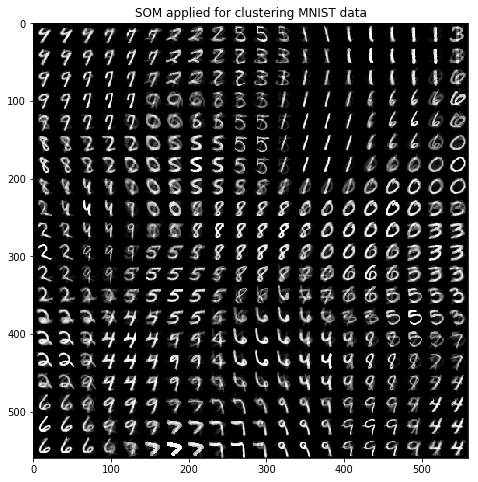

In [7]:
# Showing Image
plt.imshow(map_matrix)
plt.title("SOM applied for clustering MNIST data")

## MNIST data with PCA applied

Since the training took a lot of time, we could look at the same data after applying PCA to the data.

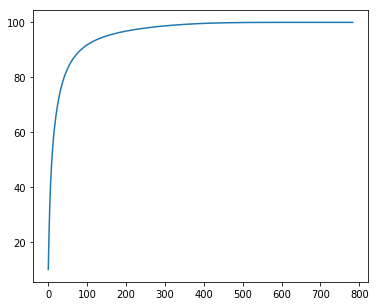

In [8]:
rndperm = np.random.permutation(train_data.shape[0])
X_rand = train_data[rndperm]

pca = PCA()
X = pca.fit_transform(X_rand)

vr = pca.explained_variance_ratio_
var1 = np.cumsum(vr)*100.0

plt.figure(figsize = (6,5))
plt.plot(var1)


In [9]:
print (var1[99])


91.7263


Since first 100 features capture more than 90% of the data, therefore we can apply PCA and use first 100 dimensions for feeding into SOM.

In [10]:
pca = PCA(n_components=100)
X_100 = pca.fit_transform(X_rand)
print (X_100.shape)

(10000, 100)


In [11]:
start3 = time.time()

# Hyperparameters
map_w = 20
map_h = 20
map_dims = (map_w, map_h)
data_dims = 100
epochs = 100
t_step = 1

# Defining Map
mnist_map1 = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
mnist_map1.train(X_100)

indices1 = mnist_map1.get_best_indices(X_100)

end3 = time.time()
print ("Time taken: ", end3-start3)

Training iteration:  0
Training iteration:  20
Training iteration:  40
Training iteration:  60
Training iteration:  80
Time taken:  397.5632779598236


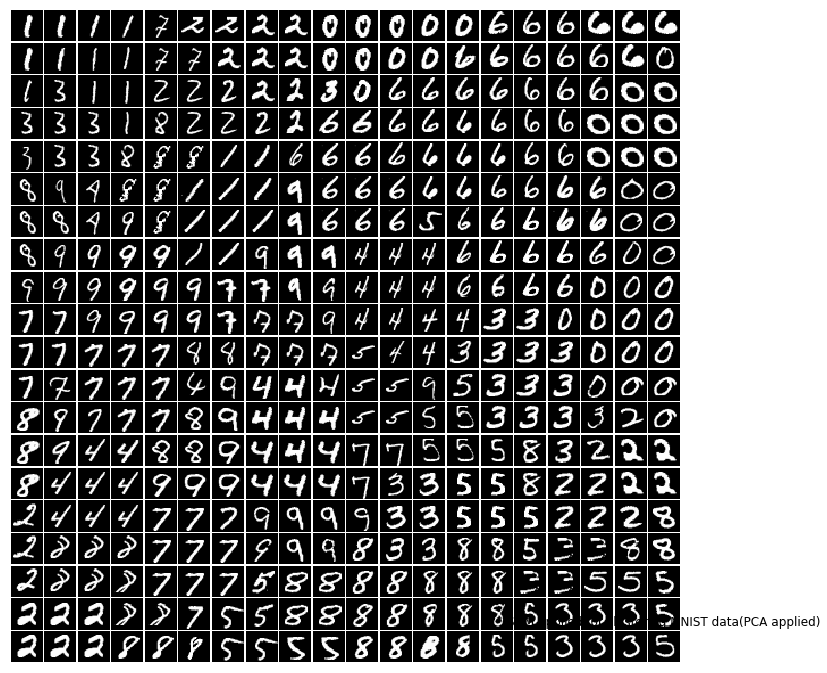

In [12]:
mnist_map1.plot_mxn(map_w, map_h, X_rand[indices1], 'som_mnist.png')
plt.title("SOM applied for clustering MNIST data(PCA applied)")

## Data 3: MNIST-fashion with PCA applied

Here we use MNIST-fashion data, the test file (10000 data points) for clustering.

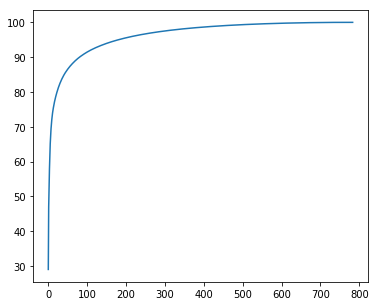

In [13]:
test_data = np.genfromtxt('fashionmnist/fashion-mnist_test.csv', delimiter=",", skip_header=1)
test_data = test_data[:,1:]
rndperm = np.random.permutation(test_data.shape[0])
X_rand2 = test_data[rndperm]

pca = PCA()
X2 = pca.fit_transform(X_rand2)

vr2 = pca.explained_variance_ratio_
var2 = np.cumsum(vr2)*100.0

plt.figure(figsize = (6,5))
plt.plot(var2)


In [14]:
print (var2[99])

91.4080634682


Since first 100 features capture more than 90% of the data, therefore we can apply PCA and use first 100 dimensions for feeding into SOM.

In [15]:
pca2 = PCA(n_components=100)
X2_100 = pca2.fit_transform(X_rand2)
print (X2_100.shape)

(10000, 100)


In [16]:
start4 = time.time()

# Hyperparameters
map_w = 20
map_h = 20
map_dims = (map_w, map_h)
data_dims = 100
epochs = 100
t_step = 1

# Defining Map
mnist_map2 = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
mnist_map2.train(X2_100)

indices2 = mnist_map2.get_best_indices(X2_100)

end4 = time.time()
print ("Time taken: ", end4-start4)

Training iteration:  0
Training iteration:  20
Training iteration:  40
Training iteration:  60
Training iteration:  80
Time taken:  328.34380173683167


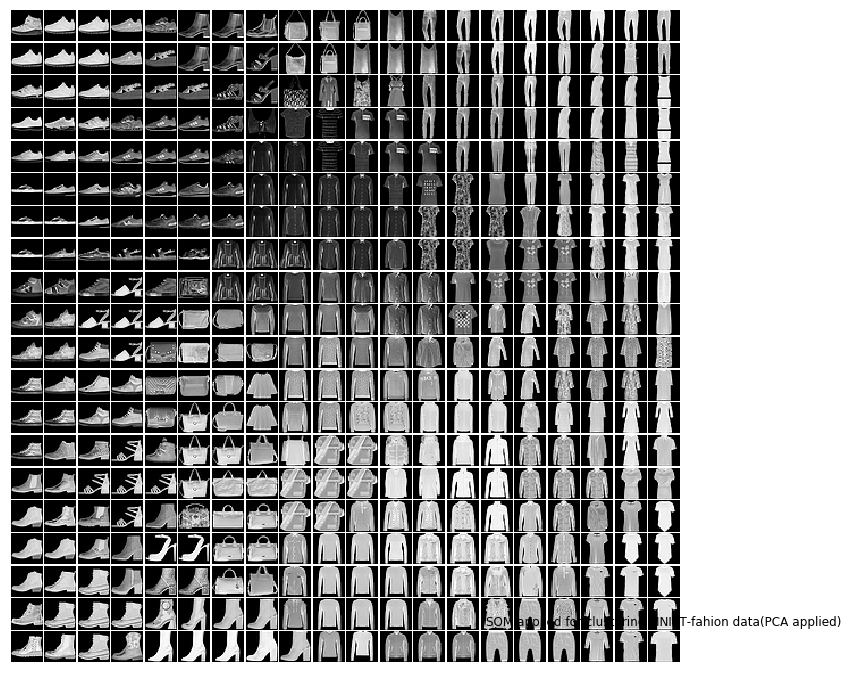

In [17]:
mnist_map2.plot_mxn(map_w, map_h, X_rand2[indices2], 'som_mnist_fashion.png')
plt.title("SOM applied for clustering MNIST-fahion data(PCA applied)")